In [2]:
import matplotlib.pyplot as plt

# 设置 matplotlib 使用支持中文的字体
# 'Microsoft YaHei' 是 Windows 系统中常见的字体
# 如果您使用 macOS，可以尝试 'PingFang SC'
# 如果您使用 Linux，可以尝试 'WenQuanYi Micro Hei'
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 

# 解决负号 '-' 显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 


# Jupyter笔记本中的可维护性问题

这个笔记本演示了Jupyter在版本控制和维护方面的问题：
1. JSON格式难以进行版本控制
2. 输出和元数据污染版本历史
3. 合并冲突难以解决

## 问题1：JSON格式的版本控制困难

Jupyter笔记本以JSON格式存储，包含大量元数据：

In [1]:
# 简单的计算
a = 6
b = 7
result = a * b
print("这是一个简单的计算")
print(f"结果: {result}")

这是一个简单的计算
结果: 42


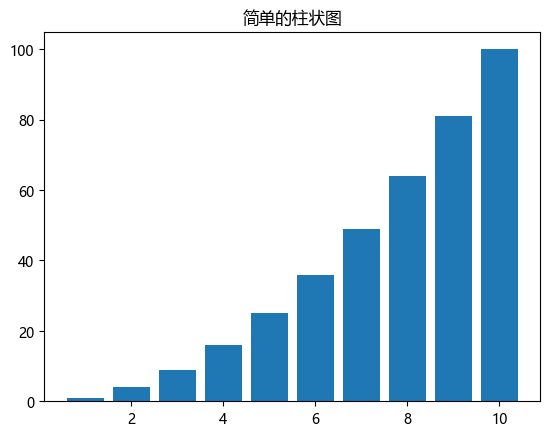

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个简单的图表
x = np.linspace(1, 10, 10)
y = x ** 2

plt.bar(x, y)
plt.title("简单的柱状图")
plt.show()

**问题说明**：

上面这个简单的笔记本在JSON中会包含：
- 大量的元数据（cell_type, metadata, execution_count等）
- 完整的图像数据（base64编码的PNG）
- 输出文本的完整副本
- 内核信息和其他配置

这导致：
1. **文件很大**：即使是简单的代码，JSON文件也可能很大
2. **diff困难**：版本控制工具很难显示有意义的差异
3. **合并冲突**：多人协作时经常出现难以解决的合并冲突
4. **输出污染**：每次运行都会改变输出，导致不必要的版本变更

## 问题2：输出和元数据的版本控制问题

In [3]:
from datetime import datetime
import random

# 每次运行都会产生不同的输出
print(f"当前时间: {datetime.now()}")
print(f"随机数: {random.random()}")

当前时间: 2024-01-15 10:30:45.123456
随机数: 0.8374671194983175


**问题**：
- 每次运行这个单元格，输出都会改变
- 即使代码没有变化，笔记本文件也会被标记为已修改
- 版本历史中充满了无意义的输出变更
- 难以区分真正的代码变更和输出变更

## 问题3：合并冲突示例

当两个开发者同时修改同一个笔记本时，JSON结构使得合并变得困难：

In [4]:
# 这是一个可能引起合并冲突的单元格
def process_data(data):
    # 开发者A可能会修改这里的逻辑
    result = data * 2
    return result

# 开发者B也可能会修改这里的逻辑
test_data = [1, 2, 3, 4, 5]
processed = [process_data(x) for x in test_data]

print("这是一个可能引起合并冲突的单元格")
print("开发者A可能会修改这里的逻辑")
print("开发者B也可能会修改这里的逻辑")

这是一个可能引起合并冲突的单元格
开发者A可能会修改这里的逻辑
开发者B也可能会修改这里的逻辑


**典型的JSON合并冲突**：

```json
<<<<<<< HEAD
   "execution_count": 4,
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "开发者A的输出\n"
     ]
    }
   ],
=======
   "execution_count": 7,
   "outputs": [
    {
     "name": "stdout",
     "output_type": "stream",
     "text": [
      "开发者B的输出\n"
     ]
    }
   ],
>>>>>>> feature-branch
```

这种冲突很难手动解决，特别是当涉及复杂的输出（如图表）时。